[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1LW0GI832qnoir1z34Qarkswt0ILyEE4g)

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [ ]:
def read_data(filename):
    """
    Reads data from the passed-in file, returning a pair of matrices (x, y)
    where each row x[i] is a d-dimensional training point with corresponding
    label y[i].
    """
    data = np.loadtxt(filename, comments='#', delimiter=',')
    # The first column of each row is the label y
    y = data[:,0]
    x = data[:,1:]
    # Add bias column
    x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    return (x, y)

In [ ]:
import requests

url_dict = {
    'wine_training1.txt': 'https://drive.google.com/uc?export=download&id=178ewdrScC06GzCV5QzwLNLI6SYjdrGHP',
    'wine_training2.txt': 'https://drive.google.com/uc?export=download&id=16va8tYrEim6ODQo7HJq-oJ2Cd-eOITw2',
    'wine_validation.txt': 'https://drive.google.com/uc?export=download&id=1ml7m8HEeZABtNhgec6nJfb4kVLsFyxlx',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [ ]:
# Download files
download_file('wine_training1.txt')
download_file('wine_training2.txt')
download_file('wine_validation.txt')

# Read in training data
x1, y1 = read_data('wine_training1.txt')
x2, y2 = read_data('wine_training2.txt')

# Read in validation data
xvalid, yvalid = read_data('wine_validation.txt')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [ ]:
#code from last homework
def loss(X, Y, w):
    '''
    Calculate the log loss

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
        lamb: float

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    return np.mean(np.log(1 + np.exp(-Y * np.matmul(X, np.transpose(w)))))

def gradient(x, y, w, lamb, N):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        lamb: lambda

    Output:
        The gradient of the loss with respect to w.
    '''
    return ((-y * x)/(np.exp(y * np.matmul(np.transpose(w), x)) + 1))+ 2 * lamb / N * w

def SGD(X, Y, w_start, eta, N_epochs, lamb):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        lamb: lambda regularization term

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    '''
    N = len(Y)
    w = w_start
    for i in range(N_epochs):
      rand = np.random.permutation(N)
      for j in rand:
        w -= eta * gradient(X[j, :], Y[j], w, lamb, N)
    return w

In [ ]:
# normalize X, except last term (bc of bias column from read_data)
X1 = x1[:, :-1]
mean_x1 = np.mean(X1, axis=0)
std_x1 = np.std(X1, axis=0)
X1 = (X1 - mean_x1) / std_x1
X1 = np.append(X1, np.ones((X1.shape[0], 1)), axis=1)

X2 = x2[:, :-1]
mean_x2 = np.mean(X2, axis=0)
std_x2 = np.std(X2, axis=0)
X2 = (X2 - mean_x2) / std_x2
X2 = np.append(X2, np.ones((X2.shape[0], 1)), axis=1)

#normalize valid with training mean and std
xvalid_1 = (xvalid[:, :-1] - mean_x1) / std_x1
xvalid_2 = (xvalid[:, :-1] - mean_x2) / std_x2
X_V1 = np.append(xvalid_1, np.ones((xvalid_1.shape[0], 1)), axis=1)
X_V2 = np.append(xvalid_2, np.ones((xvalid_2.shape[0], 1)), axis=1)

In [ ]:
# Training
N_epochs = 20000
eta = 5 * 10 ** -4
lambs = [1e-5 * (5 ** i) for i in range(15)]

E_ins_x1 = []
E_ins_x2 = []
E_outs_x1 = []
E_outs_x2 = []
norm_x1 = []
norm_x2 = []

for lamb in lambs:
  w1 = np.random.random(len(X1[0]))/ 100
  w2 = np.random.random(len(X2[0]))/ 100

  final_w1 = SGD(X1, y1, w1, eta, N_epochs, lamb)
  final_w2 = SGD(X2, y2, w2, eta, N_epochs, lamb)

  #test
  E_in_x1 = loss(X1, y1, final_w1)
  E_in_x2 = loss(X2, y2, final_w2)
  #val
  E_out_x1 = loss(X_V1, yvalid, final_w1)
  E_out_x2 = loss(X_V2, yvalid, final_w2)

  E_ins_x1.append(E_in_x1)
  E_ins_x2.append(E_in_x2)
  E_outs_x1.append(E_out_x1)
  E_outs_x2.append(E_out_x2)
  norm_x1.append(np.linalg.norm(final_w1))
  norm_x2.append(np.linalg.norm(final_w2))

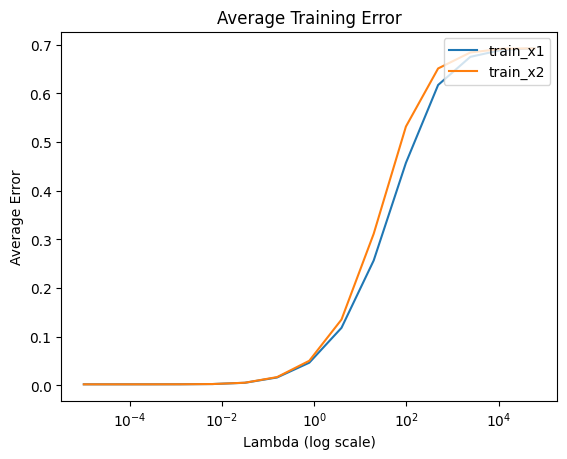

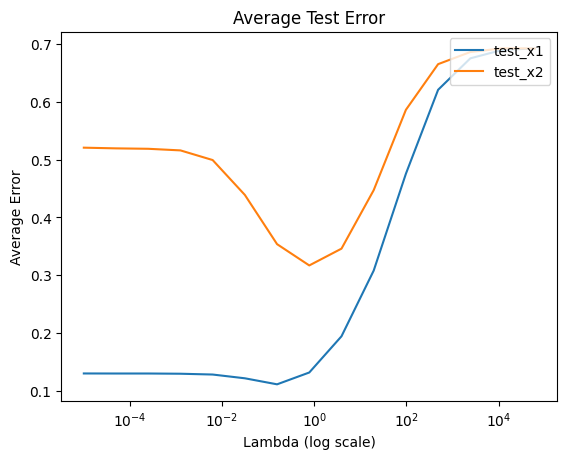

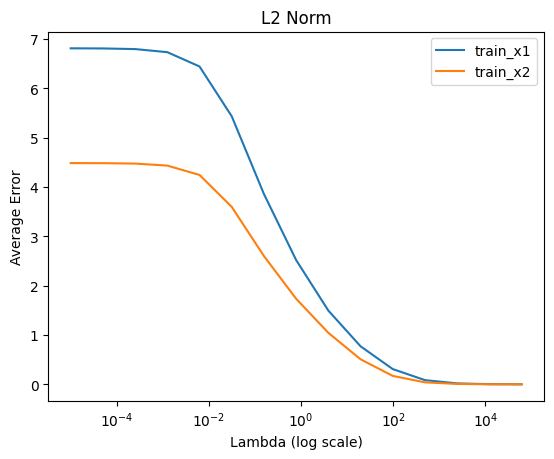

In [ ]:
def plot(arr1, arr2, arr1_label, arr2_label, xlabel, ylabel, title):
  plt.figure()
  plt.plot(lambs, arr1, label = arr1_label)
  plt.plot(lambs, arr2, label = arr2_label)
  plt.xscale('log')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend(loc='upper right')
  plt.show()

# average training error
plot(E_ins_x1, E_ins_x2, 'train_x1', 'train_x2', 'Lambda (log scale)', 'Average Error', 'Average Training Error')
# average test error
plot(E_outs_x1, E_outs_x2, 'test_x1', 'test_x2', 'Lambda (log scale)', 'Average Error', 'Average Test Error')
# l2 norm
plot(norm_x1, norm_x2, 'train_x1', 'train_x2', 'Lambda (log scale)', 'Average Error', 'L2 Norm')